In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv("zomato.csv",encoding='latin-1')

In [19]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [21]:
df.isnull().sum() #missing values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [23]:
null_features = [feature for feature in df.columns if df[feature].isnull().sum()>0]

<AxesSubplot:>

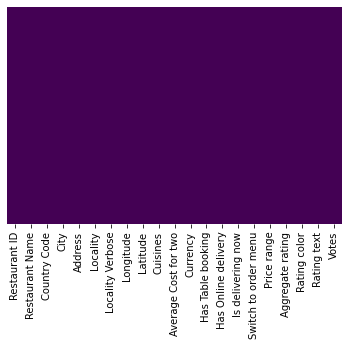

In [28]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap ='viridis')

In [34]:
df2 = pd.read_excel('Country-Code.xlsx')

In [35]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [38]:
comb = pd.merge(df,df2,on=['Country Code'],how='left')

In [50]:
#count different values in column country

country_names= comb.Country.value_counts().index
country_values= comb.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x290c5103630>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

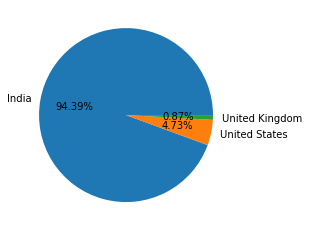

In [53]:
plt.pie(country_values[:3],labels = country_names[:3],autopct='%1.2f%%')

Observation: zomato maximum records or transaction is from India, then USA and then UK

In [59]:
ratings = comb.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0: 'Rating count'})

In [60]:
ratings

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observations:
1. when rating is from 4.5 - 4.9 ---> Excellent
2. when rating is from 4.0 - 3.4 ---> Very good
3. when rating is from 3.5 - 3.9 ---> good
4. when rating is from 3.0 - 2.9 ---> average
5. when rating is from 2.0 - 2.4 ---> poor


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating count'>

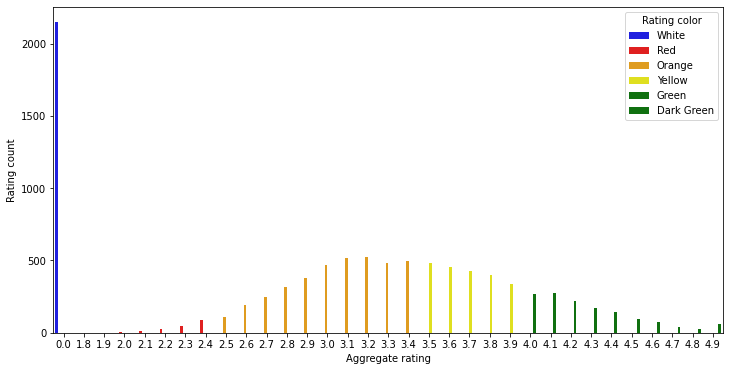

In [74]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating',y='Rating count',hue= 'Rating color',data = ratings,palette=['blue', 'red', 'orange', 'yellow', 'green','green'])

## Observations

1. Not rating count is very high
2. Maximun no of rating between 2.5 to 3.9

<AxesSubplot:xlabel='Rating color', ylabel='count'>

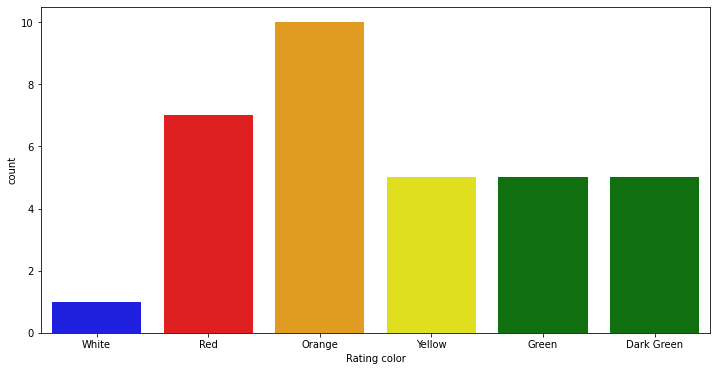

In [76]:
sns.countplot(x='Rating color',data=ratings,palette=['blue', 'red', 'orange', 'yellow', 'green','green'] )

In [83]:
#Find the countries names that has given 0 rating
d1 = comb[comb['Aggregate rating']==0]['Country'].value_counts()

In [91]:
#find out which currency is used by which country

comb.groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [93]:
comb.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [97]:
#which countries do have online delivery?

comb[['Country','Has Online delivery']].groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [102]:
city_values = comb.City.value_counts().values[:5]
city_counts = comb.City.value_counts().index[:5]

In [108]:
city_counts

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad'], dtype='object')

([<matplotlib.patches.Wedge at 0x290cb961eb8>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

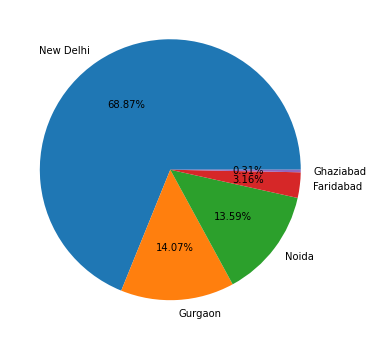

In [109]:
#create a pie chart for cities distribution

plt.pie(city_values,labels=city_counts,autopct = '%1.2f%%')

In [129]:
#find top 10 cuisines
from collections import Counter
my_list = Counter(comb['Cuisines'].tolist())